In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from keras import metrics

from keras.models import Sequential, Model
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPool2D, Dropout
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

from os import listdir
from matplotlib import image
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Using CNN Section

## Gamma Function 
Gamma correction, or often simply gamma, is a nonlinear operation used to encode and decode luminance or tristimulus values in video or still image systems.


In [2]:
def adjust_gamma(image, gamma = 1.0):
    invGamma = 1.0 / gamma
    
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)])
    return cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))

In [3]:
data = []
gamma = 2.5
normal_count = 0
pneumonia_count = 0
img_size = 64
assign_dict = {"0":0, "1":1}

def get_data(directory):
    for sub_directory in os.listdir(directory):
        if sub_directory == "0":
            inner_directory = os.path.join(directory,sub_directory)
            for i in os.listdir(inner_directory):
                img = cv2.imread(os.path.join(inner_directory,i),0)
                img =  adjust_gamma(img, gamma=gamma)
                img = cv2.resize(img,(img_size,img_size))
                data.append([img,assign_dict[sub_directory]])
                
        if sub_directory == "1":
            inner_directory = os.path.join(directory,sub_directory)
            for i in os.listdir(inner_directory):
                img = cv2.imread(os.path.join(inner_directory,i),0)
                img =  adjust_gamma(img, gamma=gamma)
                img = cv2.resize(img,(img_size,img_size))
                data.append([img,assign_dict[sub_directory]])
    random.shuffle(data)  
    return np.array(data)

## Loading Dataset

In [4]:
train = get_data('./data')
val = get_data('./data')
test = get_data('./data')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5856\3585548566.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [5]:
image_count = []

directory = './data'
total_image = 0
'''
  Display  amount of data with_mask and without_mask
'''

def data_image(directory, total_image):
    for category in os.listdir(directory):
        img_dir = os.path.join(directory, category)
        img = len(os.listdir(img_dir))
        # Tampung gambar
        image_count.append(img)
        total_image += img
        print(f"{category} : {img}")
    print("Total Image : ", total_image)

data_image(directory,total_image)

0 : 19445
1 : 22348
Total Image :  41793


C:\Users\Admin\anaconda3\envs\CPUTensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

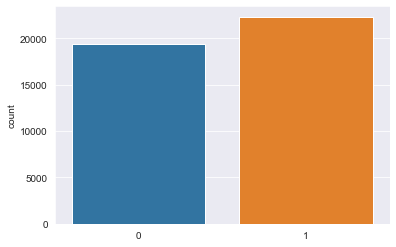

In [6]:
'''
  Display visualization amount of data normal and pneumonia
'''

l = []
for i in train:
    if(i[1] == 0):
        l.append("0")
    else:
        l.append("1")
sns.set_style('darkgrid')
sns.countplot(l)

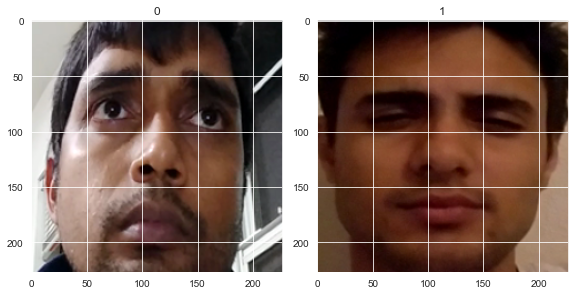

In [7]:
from random import randint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

'''
  Display image from sample folder
'''

fig = plt.figure(figsize = (20,15))
ax = []
i = 1

new_dir = './data'

for image in os.listdir(new_dir):
    ax.append(fig.add_subplot(1,5,i))
    i += 1
    ax[-1].set_title(str(image))
    image_folder = os.path.join(new_dir, image)
    rnd_number = randint(0, len(os.listdir(image_folder)))
    image_file = os.listdir(image_folder)[rnd_number]
    image_file = os.path.join(image_folder, image_file)
    image_show = mpimg.imread(image_file)
    plt.imshow(image_show)

fig.tight_layout()
plt.show()

In [8]:
x_train = []
y_train = []
for features,label in train:
    x_train.append(features)
    y_train.append(label)

In [9]:
x_value = []
y_value = []
for features,label in val:
    x_value.append(features)
    y_value.append(label)

In [10]:
x_test = []
y_test = []
for features,label in test:
    x_test.append(features)
    y_test.append(label)

In [11]:
# Create dateset:
x_train = 1-np.array(x_train).astype('float32')/255.
y_train = np.array(y_train).astype('float32')
y_train = to_categorical(y_train, 2)
if not os.path.exists('npy_dd/'):
    os.makedirs('npy_dd/')
    np.save('npy_dd/x_train.npy', x_train)
    np.save('npy_dd/y_train.npy', y_train)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
np.save('npy_dd/x_test.npy', x_test)
np.save('npy_dd/y_test.npy', y_test)
np.save('npy_dd/x_train.npy', x_train)
np.save('npy_dd/y_train.npy', y_train)

In [12]:
x_test.shape

(8359, 64, 64)

In [13]:
y_train.shape

(33434, 2)

In [14]:
x_train.shape

(33434, 64, 64)